## Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

Il programma implementato per risolvere questo esercizio è composto da tre file:
- main.cpp
- random.cpp
- datablocking.cpp

### **main.cpp**
Il file contiene il *main()* del programma; 
- Il primo comando eseguito è la dichiarazione e l'inizializazione del generatore di numeri casuali fornito *rnd* mediante l'uso della funzione *initialization()* definita in *random.cpp*. Seguono due cicli for. Il primo che scorre lungo gli L blocchi in cui si vuole suddividere gli M numeri casuali prodotti dal generatore, il secondo che cicla sui N numeri di ciascun blocco. In ogni ciclo di N passi vengono genrati e sommati N numeri, nel ciclo più esterno viene calcolata la media dei numeri fino ad ora ottenuti, che viene salvata nel vettore di L posti *AV*.
- Una volta completati i due cicli for si procede a fare il datablocking dei dati salvati nel vettore *AV*, tale compito è svolto dalla funzione *DataBlocking* definita in *databloking.cpp*.
- La seconda metà del *main* contiene una copia del codice appena descritto con la sola differenza che i numeri casuali generati prima di essere sommati vengono modificati secondo la seguente relazione $ (x-1/2)^2 $ in modo da fornire una stima del secondo integrale richiesto.


### **random.cpp**:
Il file contiente la definizione e l'iplementazione della classe *Random* fornitoci dal professore. E' stata poi aggiunta una funzione *initialization* che non accetta nulla come input e restituisce un oggetto di tipo *Random*, al suo interno vengono letti i semi con cui iniziare a produrre numeri casuali utilizzando i file e il codice fornotoci.


### **datablockong.cpp**: 
Il file contiene la definizione e l'iplementazione di due funzioni ononime *DataBlocking*. Queste accettano in input un puntatore double o il nome di un file da cui si leggeranno i dati con cui si vuole operare, un intero che indica il numero di dati da leggere, una stringa di caratteri che indica il nome del file di output.
Le due funzioni all'interno possiedono la stessa struttura: due cicli for uno esterno che si muove lungo il numero di dati fornito e uno interno che partendo da 0 somma tutti i dati letti fino a quel momento. Il ciclo esterno salva la somma e la somma dei quadrati dei dati letti fino ad ora nei vettori *AV* e *AV2*, calcola l'errore sulla media ottenuta attraverso la funzione *errore()* definita alla fine di questo file, infine vengono salvati i risultati ottenuti (numero di dati letti, media, errore) sul file di output.

### Alcune osservazioni:
- per errore della media si intende il calcolo della deviazione standard della media $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$

- per il primo dato non essendo possibile calcolare la deviazione standard della media si assume errrore nullo.

- poiché i dati di cui si vuole fare il datablockin sono già il frutto di un processo di media, calcolato nel *main.cpp*, il teorema del limite centrale ci assicura che risultati ottenuti da questo processo possiedono una distribuzione normale e la loro varianza devresce al crescere del numero di dati usati come $1/\sqrt{N}$. Questo dovrebbe portare ad avere errori sempre più piccoli al crescere del numero di blocchi utilizzati.

- nel calcolo della deviazione standard della media $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$ si è approssimato $N-1 \simeq N$. Questo risulta corretto se si assume che N sia grande, tale assunzione richiede quindi un numero di blocchi elevato (>10) e dice che le prime stime dell'errore ottenute dal contributo di pochi blocchi saranno certamente meno affidabili. Nel programma è stato fissato il numero di blocchi a 100.

Di seguito riportiamo i **grafici richiesti**:
- Stima con relativo errore dell integrale $\langle r \rangle = \int_0^1 r dr = 1/2$ in funzione del numero di blocchi

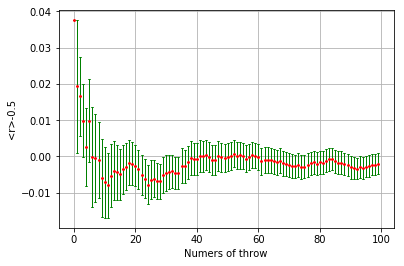

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1, f1, error1 = np.loadtxt("./code/Risultati1.dat", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x1,f1-0.5,yerr=error1, fmt='r.', errorevery=1, elinewidth=1, ecolor='green', capsize=1, ms=3)
plt.xlabel('Numers of throw')
plt.ylabel('<r>-0.5')

plt.grid(True)

plt.show()

- Stima con relativo errore dell integrale $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ in funzione del numero di blocchi 

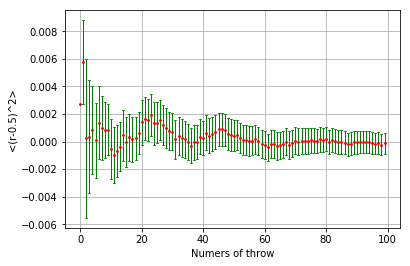

In [4]:
x1, f1, error1 = np.loadtxt("./code/Risultati2.dat", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x1,f1-1./12.,yerr=error1, fmt='r.', errorevery=1, elinewidth=1, ecolor='green', capsize=1, ms=3)
plt.xlabel('Numers of throw')
plt.ylabel('<(r-0.5)^2>')

plt.grid(True)

plt.show()

- Test del $\chi^2$ tra una distribuzione uniforme tra [0,1] e 100 set di 10000 numeri casuali ciascuno ottenuti con il generatore fornito

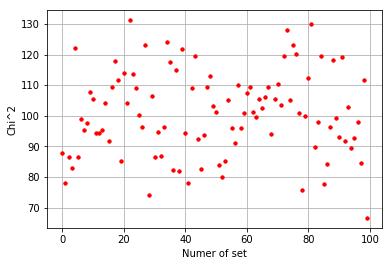

In [6]:
x1, f1 = np.loadtxt("./code/RisultatiChiQuadro.dat", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x1,f1, 'r.')
plt.ylabel('Chi^2')
plt.xlabel('Numer of set')

plt.grid(True)

plt.show()